In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [19]:
superstore = pd.read_csv('Sample - Superstore.csv', encoding='latin1')


In [20]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
superstore.shape

(9994, 21)

In [23]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
superstore.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [26]:
superstore.isnull().sum()
#no null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [32]:
superstore.duplicated().sum()

0

In [30]:
superstore['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [31]:
superstore['Product Name'].value_counts()

Product Name
Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                 

In [36]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])

In [45]:
print(f"Number of Orders: {len(superstore['Order ID'].unique())}")

Number of Orders: 5009


In [46]:
# Exploratory analysis/visualization

vis_superstore = superstore.copy()

In [69]:
vis_superstore['Year'] = superstore['Order Date'].dt.year

In [73]:
year_sales = vis_superstore.groupby('Year')['Sales'].sum().reset_index()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/25724608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = year_sales, x = 'Year', y = 'Sales', palette = colors)


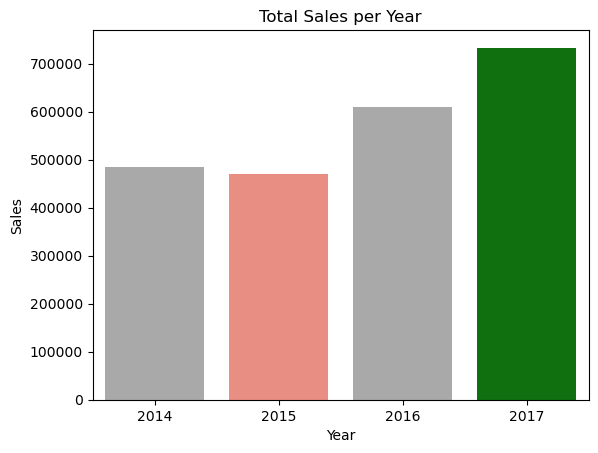

In [139]:
max_index_yr = year_sales['Sales'].idxmax()
min_index_yr = year_sales['Sales'].idxmin()

colors = ['darkgrey' for i in range(len(year_sales))]
colors[max_index_yr] = 'green'
colors[min_index_yr] = 'salmon'

sns.barplot(data = year_sales, x = 'Year', y = 'Sales', palette = colors)
plt.title('Total Sales per Year')
plt.show()

In [47]:
vis_superstore['Month'] = vis_superstore['Order Date'].dt.month

In [49]:
month_sales = vis_superstore.groupby('Month')['Sales'].mean().reset_index()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/479151878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = month_sales, x = 'Month', y = 'Sales', palette=colors)


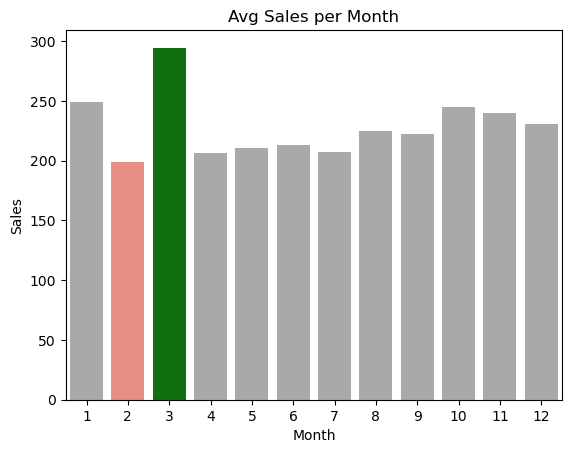

In [138]:
max_index = month_sales['Sales'].idxmax()
min_index = month_sales['Sales'].idxmin()


colors = ['darkgrey' for i in range(len(month_sales))]
colors[max_index] = 'green'
colors[min_index] = 'salmon'


sns.barplot(data = month_sales, x = 'Month', y = 'Sales', palette=colors)
plt.title('Avg Sales per Month')
plt.show()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/538263440.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = profit_month, x = 'Month', y = 'Profit', palette = colors)


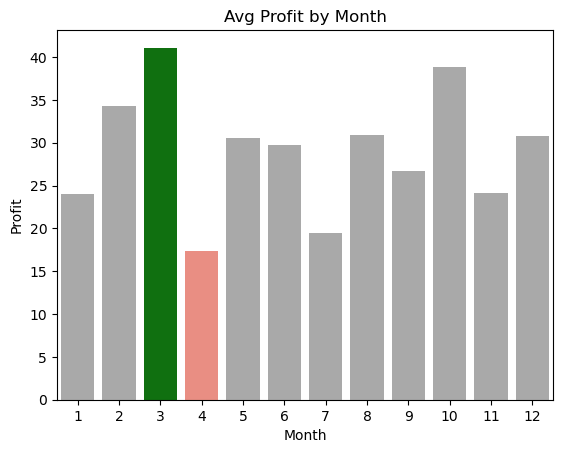

In [137]:
profit_month = vis_superstore.groupby('Month')['Profit'].mean().reset_index()
profit_month = profit_month.sort_values('Profit')

max_index_profit = profit_month['Profit'].idxmax()
min_index_profit = profit_month['Profit'].idxmin()

colors = ['darkgrey' for i in range(len(profit_month))]
colors[max_index_profit] = 'green'
colors[min_index_profit] = 'salmon'

sns.barplot(data = profit_month, x = 'Month', y = 'Profit', palette = colors)
plt.title('Avg Profit by Month')
plt.show()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3647462644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_customers, x = 'Customer Name', y = 'Sales', palette = 'Greens')


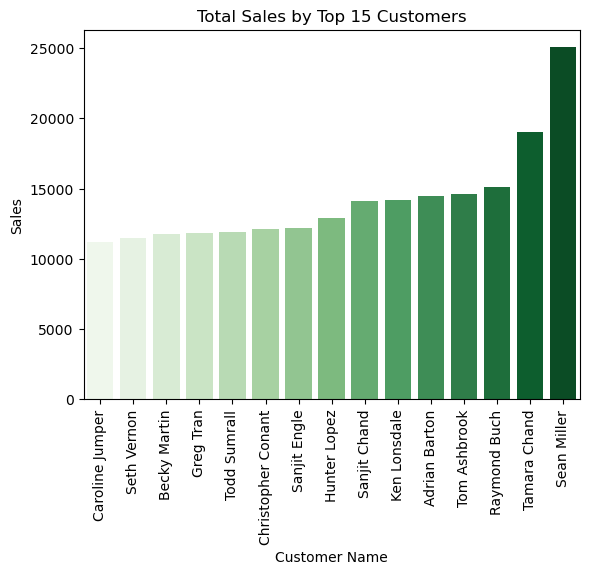

In [88]:
sum_cust_sales = vis_superstore.groupby('Customer Name')['Sales'].sum().reset_index()
sum_cust_sales = sum_cust_sales.sort_values(by='Sales')

top_customers = sum_cust_sales.tail(15)


sns.barplot(data = top_customers, x = 'Customer Name', y = 'Sales', palette = 'Greens')
plt.xticks(rotation=90)
plt.title('Total Sales by Top 15 Customers')
plt.show()

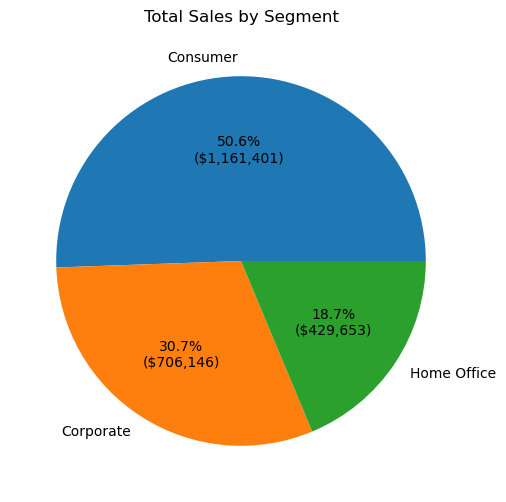

In [101]:
segment_sales = vis_superstore.groupby('Segment')['Sales'].sum().reset_index()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n(${v:,})'.format(p=pct,v=val)
    return my_autopct


fig = plt.figure(figsize = (10,6))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct = make_autopct(segment_sales['Sales']))
plt.title('Total Sales by Segment')
plt.show()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/2468727120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = subcat_sales, x = 'Sub-Category', y = 'Sales', palette = 'Greens')


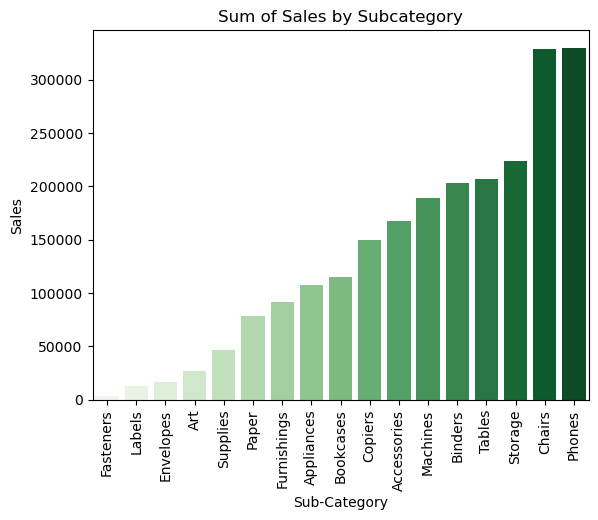

In [111]:
subcat_sales = vis_superstore.groupby('Sub-Category')['Sales'].sum().reset_index()
subcat_sales = subcat_sales.sort_values('Sales')

sns.barplot(data = subcat_sales, x = 'Sub-Category', y = 'Sales', palette = 'Greens')
plt.xticks(rotation= 90)
plt.title('Sum of Sales by Subcategory')
plt.show()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3552535883.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = subcategory_profit, x = 'Sub-Category', y = 'Profit', palette = colors)


NameError: name 'pt' is not defined

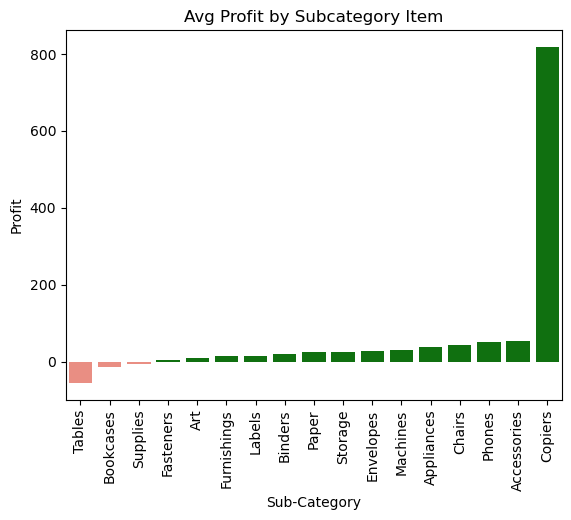

In [206]:
subcategory_profit = vis_superstore.groupby('Sub-Category')['Profit'].mean().reset_index()
subcategory_profit = subcategory_profit.sort_values('Profit')

colors = ['salmon' if x < 0 else 'green' for x in subcategory_profit['Profit']]

sns.barplot(data = subcategory_profit, x = 'Sub-Category', y = 'Profit', palette = colors)
plt.xticks(rotation = 90)
plt.title('Avg Profit by Subcategory Item')
pt.show()

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/2548107924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = subcategory_discount, x = 'Sub-Category', y = 'Discount', palette = 'Blues')


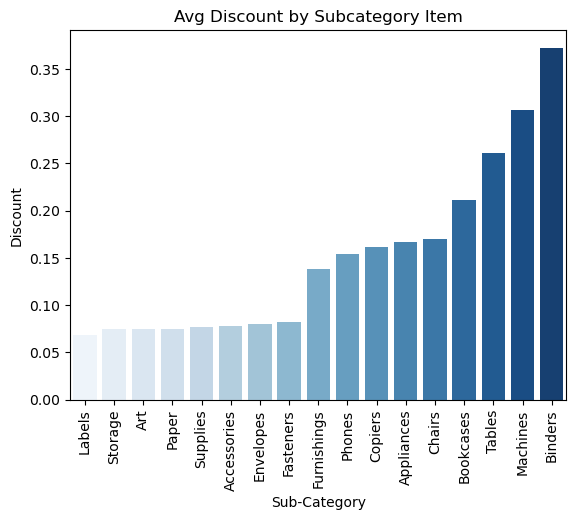

In [197]:
subcategory_discount = vis_superstore.groupby('Sub-Category')['Discount'].mean().reset_index()
subcategory_discount = subcategory_discount.sort_values('Discount')


sns.barplot(data = subcategory_discount, x = 'Sub-Category', y = 'Discount', palette = 'Blues')
plt.xticks(rotation = 90)
plt.title('Avg Discount by Subcategory Item')
plt.show()

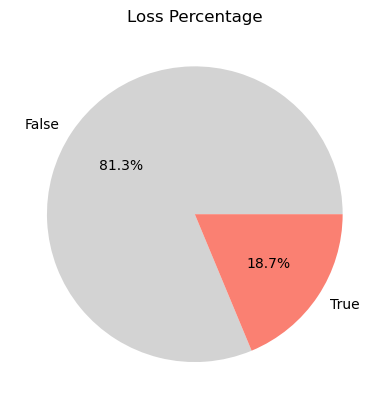

In [135]:
vis_superstore['loss'] = vis_superstore['Profit'] < 0 
loss = vis_superstore.groupby('loss').count().sort_values(by = 'loss')

plt.pie(loss['Profit'], labels=loss.index, colors = ['lightgrey', 'salmon'], autopct='%1.1f%%')
plt.title('Loss Percentage')
plt.show()

In [ ]:
### Predicting Loss/Profit Models

In [142]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
# Simple Linear Regression - Profitability Prediction

x = superstore[['Discount', 'Quantity', 'Sales']]
y = superstore['Profit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"R-Squared: {r2_score(y_test, y_pred)}")
print(f"Mean-Squared-Error: {mean_squared_error(y_test, y_pred)}")

R-Squared: 0.4043156847427588
Mean-Squared-Error: 19013.426850795


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Classification for Loss Prediction

x = vis_superstore[['Discount', 'Quantity', 'Sales']]
x['original_index'] = vis_superstore.index
y = vis_superstore['loss']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=1)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1615   10]
 [ 127  247]]
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      1625
        True       0.96      0.66      0.78       374

    accuracy                           0.93      1999
   macro avg       0.94      0.83      0.87      1999
weighted avg       0.93      0.93      0.93      1999



/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3855119934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['original_index'] = vis_superstore.index
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model does well predicting loss correctly (96% precision)
# Recall for loss is low (66%), meaning the model is failing to predict about 34% of unprofitable orders. 

In [158]:
# Data set may be imbalanced since < 19% are losses
# Try balancing it
clf_balanced = LogisticRegression(class_weight='balanced')
clf_balanced.fit(x_train.drop(columns='original_index'), y_train)


y_pred = clf_balanced.predict(x_test.drop(columns='original_index'))

results = x_test.copy()
results['y_test'] = y_test.values
results['y_pred'] = y_pred

merged = vis_superstore.merge(results, left_index=True, right_on='original_index')

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1593   32]
 [ 107  267]]
              precision    recall  f1-score   support

       False       0.94      0.98      0.96      1625
        True       0.89      0.71      0.79       374

    accuracy                           0.93      1999
   macro avg       0.92      0.85      0.88      1999
weighted avg       0.93      0.93      0.93      1999



In [164]:
merged['estimated_cost'] = merged['Sales_x'] - merged['Profit']
merged = merged[merged['Quantity_x'] > 0]

true_positives = merged[(merged['y_test'] == 1) & (merged['y_pred'] == 1)]
prevented_losses = true_positives['estimated_cost'].sum()

print(f"Estimated losses prevented by model: ${prevented_losses:,.2f}")

Estimated losses prevented by model: $97,583.58


In [ ]:
# This reduces potential loss by ~ $97.583.58. 
# Reduced loss by implementing this model to predict transactions that have loss.
# Could use this to flag orders before fulfillment to investigate further.

In [150]:
# Naive Bayes for Loss Prediction
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1602   23]
 [ 151  223]]
              precision    recall  f1-score   support

       False       0.91      0.99      0.95      1625
        True       0.91      0.60      0.72       374

    accuracy                           0.91      1999
   macro avg       0.91      0.79      0.83      1999
weighted avg       0.91      0.91      0.91      1999



In [ ]:
# Performance of Naive Bayes is not as good as the balanced Logistic Regression model. 

In [ ]:
# Which factors contribute most to profit and loss on individual orders?

In [177]:
cat_profit = vis_superstore.groupby('Category')['Profit'].mean().sort_values().reset_index()

region_profit = vis_superstore.groupby('Region')['Profit'].mean().sort_values().reset_index()

print(f"Avg Profit by Category: {cat_profit}")
print(f"\nAvg Profit by Region: {region_profit}")

#Furniture has a very low profit and the Central region has the lowest profit

Avg Profit by Category:           Category     Profit
0        Furniture   8.699327
1  Office Supplies  20.327050
2       Technology  78.752002

Avg Profit by Region:     Region     Profit
0  Central  17.092709
1    South  28.857673
2     East  32.135808
3     West  33.849032


Text(0.5, 1.0, 'Avg Profit by Category')

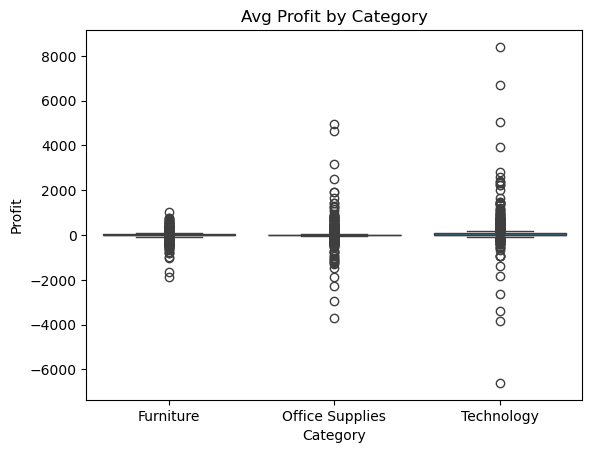

In [173]:
sns.boxplot(data = vis_superstore, x = 'Category', y = 'Profit')
plt.title('Avg Profit by Category')

Text(0.5, 1.0, 'Profit vs Discount')

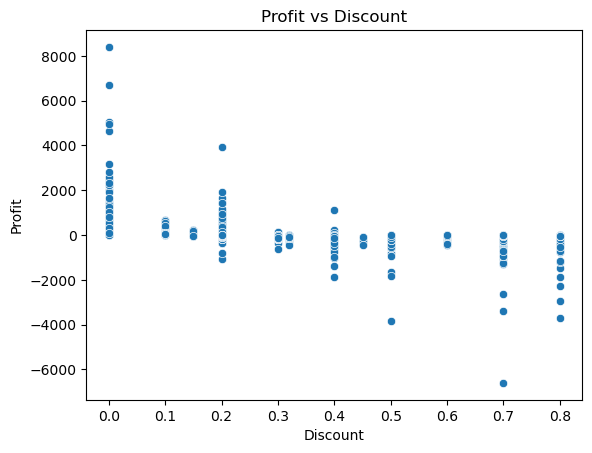

In [174]:
sns.scatterplot(data = vis_superstore, x = 'Discount', y = 'Profit')
plt.title('Profit vs Discount')

# Higher discounts associated with lower profit. 

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

features = ['Discount', 'Quantity', 'Sales', 'Category', 'Region', 'Ship Mode']
target = 'Profit'

x = vis_superstore[features]
y = vis_superstore[target]

categorical = ['Category', 'Region', 'Ship Mode']
numeric = ['Discount', 'Quantity', 'Sales']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', 'passthrough', numeric)
])

model = Pipeline([
    ('preprocess', preprocessor),
    ('linreg', LinearRegression())
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Category', 'Region',
                                                   'Ship Mode']),
                                                 ('num', 'passthrough',
                                                  ['Discount', 'Quantity',
                                                   'Sales'])])),
                ('linreg', LinearRegression())])

In [176]:
encoded_cols = model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical)
all_features = list(encoded_cols) + numeric

coefficients = model.named_steps['linreg'].coef_

coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coef_df)

                     Feature  Coefficient
0   Category_Office Supplies    47.716085
1        Category_Technology    45.474990
10                     Sales     0.180214
9                   Quantity    -3.426195
7   Ship Mode_Standard Class    -6.866759
5         Ship Mode_Same Day    -7.838649
6     Ship Mode_Second Class   -10.464312
2                Region_East   -12.370518
4                Region_West   -15.517093
3               Region_South   -19.722380
8                   Discount  -249.553721


In [ ]:
# Office supplies and techonology are associated most with a positive trend in profit. 
# Discounts are the top correlated factor with loss, followed by Southern, Western, and Eastern regions respectively. 

In [ ]:
# How should marketing or pricing strategies differ by region?

In [179]:
region_profit = vis_superstore.groupby('Region')['Profit'].agg(['mean', 'sum', 'count'])
region_profit.columns = ['Avg_Profit', 'Total_Profit', 'Num_Orders']
print(region_profit.sort_values(by = 'Avg_Profit'))

         Avg_Profit  Total_Profit  Num_Orders
Region                                       
Central   17.092709    39706.3625        2323
South     28.857673    46749.4303        1620
East      32.135808    91522.7800        2848
West      33.849032   108418.4489        3203


In [ ]:
# The West brings in the most profit both per order and overall, but based on earlier analysis also has a higher correlation with loss.

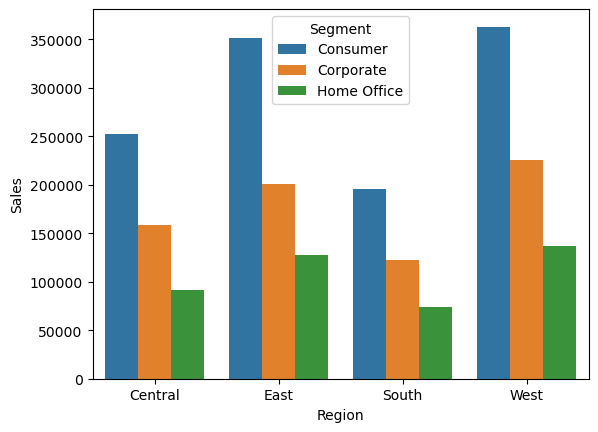

In [181]:
region_segment = vis_superstore.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()
sns.barplot(data = region_segment, x = 'Region', y = 'Sales', hue ='Segment')
plt.show()

In [ ]:
# The West and the East have a heavier consumer population and would benefit from direct to consumer marketing (email, promos, etc)

In [ ]:
# B2B marketing would benefit in West and East as well, since they have higher corporate population.

In [ ]:
# Room to grow in South and Central. Need to focus on encouraging demand in these areas, partner with businesses or run promotions.

In [ ]:
#The Central region has an abundant number of sales, but still has lowest profit. This may indicate a pricing issue.
# The Central's Corporate and Home Office segments are similar to other regions, but it lags in the Consumer segment compared to East and West. 

In [182]:
print("Correlation between Discount and Profit:", vis_superstore['Discount'].corr(vis_superstore['Profit']))
print("Correlation between Discount and Sales:", vis_superstore['Discount'].corr(vis_superstore['Sales']))


Correlation between Discount and Profit: -0.21948745637176834
Correlation between Discount and Sales: -0.02819012415753557


In [198]:
vis_superstore['discount_bin'] = pd.cut(
    vis_superstore['Discount'],
    bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.5, 1.0],
    labels=['0%', '1–10%', '11–20%', '21–30%', '31–50%', '51–100%']
)

discount_stats = vis_superstore.groupby('discount_bin').agg({
    'Profit': ['mean', 'sum'],
    'Sales': ['mean', 'sum'],
    'Discount': 'count'
}).reset_index()

discount_stats.columns = ['Discount Bin', 'Avg Profit', 'Total Profit', 'Avg Sales', 'Total Sales', 'Order Count']


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3140930245.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_stats = vis_superstore.groupby('discount_bin').agg({


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/1123507859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Bin', y='Avg Profit', data=discount_stats, palette = colors)


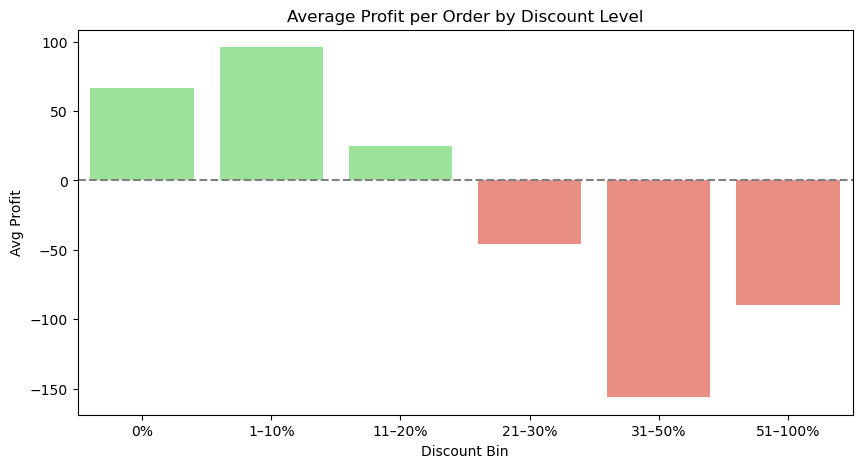

In [204]:
colors = ['salmon' if x < 0 else 'lightgreen' for x in discount_stats['Avg Profit']]

plt.figure(figsize=(10, 5))
sns.barplot(x='Discount Bin', y='Avg Profit', data=discount_stats, palette = colors)
plt.title("Average Profit per Order by Discount Level")
plt.axhline(0, color='gray', linestyle='--')


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3043935919.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_rate = vis_superstore.groupby('discount_bin')['loss'].mean().reset_index()
/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/3043935919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_rate, x='Discount Bin', y='Loss Rate', palette = "Reds")


Text(0.5, 1.0, 'Loss Rate by Discount Level')

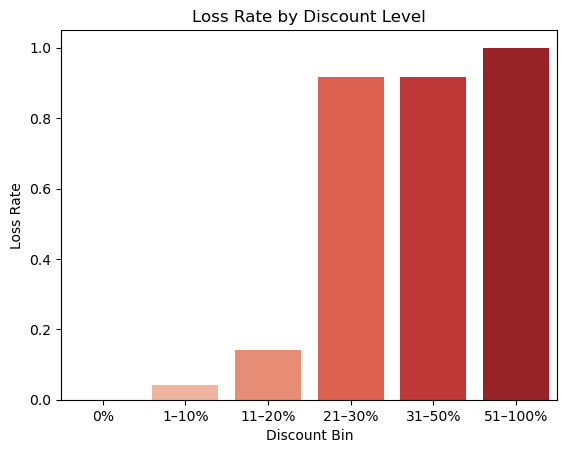

In [191]:
vis_superstore['loss'] = vis_superstore['Profit'] < 0

loss_rate = vis_superstore.groupby('discount_bin')['loss'].mean().reset_index()
loss_rate.columns = ['Discount Bin', 'Loss Rate']

sns.barplot(data=loss_rate, x='Discount Bin', y='Loss Rate', palette = "Reds")
plt.title("Loss Rate by Discount Level")


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/1396748388.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margin_by_discount = vis_superstore.groupby('discount_bin')['profit_margin'].mean().reset_index()


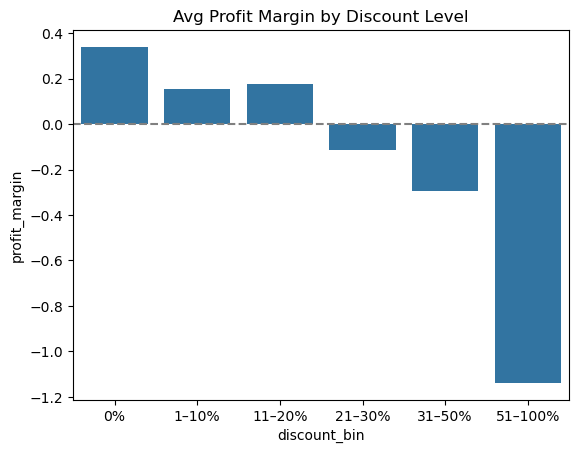

In [187]:
vis_superstore['profit_margin'] = vis_superstore['Profit'] / vis_superstore['Sales']

margin_by_discount = vis_superstore.groupby('discount_bin')['profit_margin'].mean().reset_index()

sns.barplot(data=margin_by_discount, x='discount_bin', y='profit_margin')
plt.title("Avg Profit Margin by Discount Level")
plt.axhline(0, color='gray', linestyle='--')


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/166831286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_discount = vis_superstore.groupby(['Segment', 'discount_bin'])['Profit'].mean().reset_index()


Text(0.5, 1.0, 'Average Profit by Discount Level and Customer Segment')

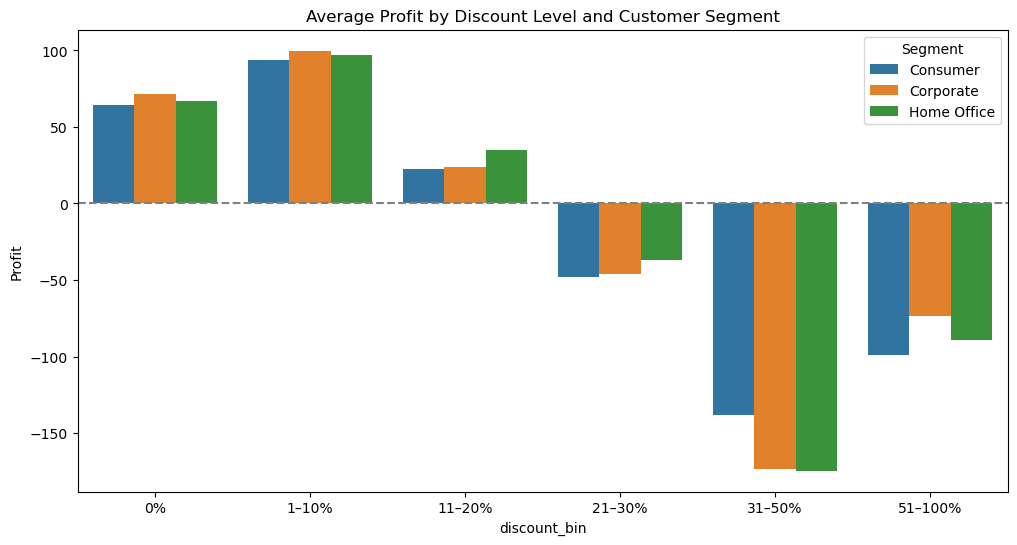

In [188]:
segment_discount = vis_superstore.groupby(['Segment', 'discount_bin'])['Profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=segment_discount, x='discount_bin', y='Profit', hue='Segment')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Profit by Discount Level and Customer Segment")


/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/610502893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_discount = vis_superstore.groupby(['Region', 'discount_bin'])['Profit'].mean().reset_index()


Text(0.5, 1.0, 'Average Profit by Discount Level and Region')

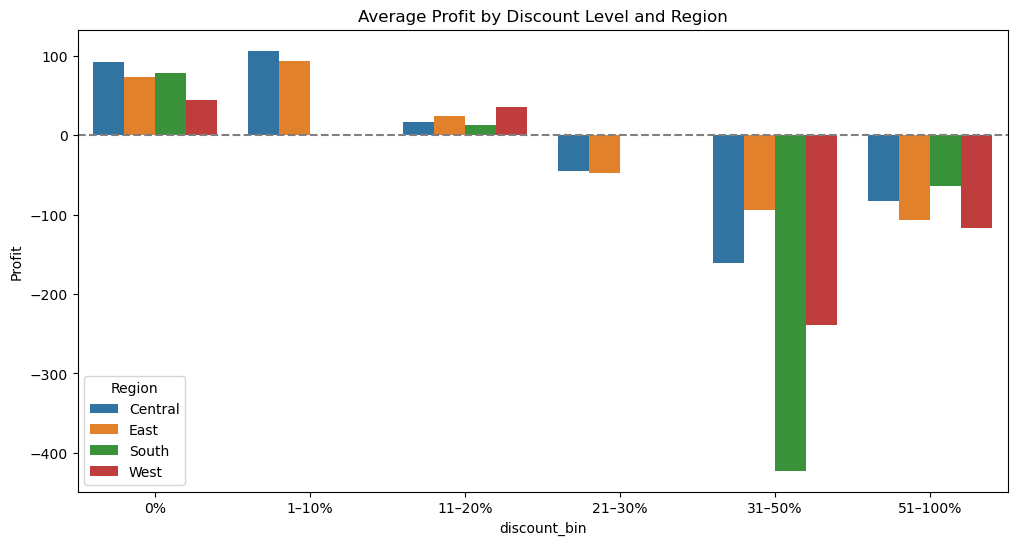

In [189]:
region_discount = vis_superstore.groupby(['Region', 'discount_bin'])['Profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_discount, x='discount_bin', y='Profit', hue='Region')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Profit by Discount Level and Region")


In [ ]:
# Cap discounts at 30%
# Reduce discounts in the South.

/var/folders/mw/x3zvx9zs2x1bktld3ck7tvrm0000gn/T/ipykernel_83954/1339193057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_loss_rate = vis_superstore.groupby(['Region', 'discount_bin'])['loss'].mean().reset_index()


Text(0.5, 1.0, 'Loss Rate by Discount Level and Region')

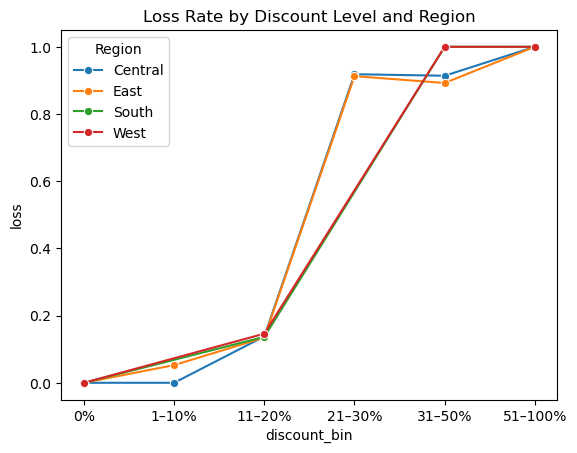

In [194]:
region_loss_rate = vis_superstore.groupby(['Region', 'discount_bin'])['loss'].mean().reset_index()

sns.lineplot(data=region_loss_rate, x='discount_bin', y='loss', hue='Region', marker='o')
plt.title("Loss Rate by Discount Level and Region")


In [ ]:
# Steep rise in loss after the 20% mark, need to be more cautious about this. 